# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [112]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [84]:
pwd

'/Users/Zak/Data-Analysis/4.fourth_week/lab-linear-regression-correlation/your-code'

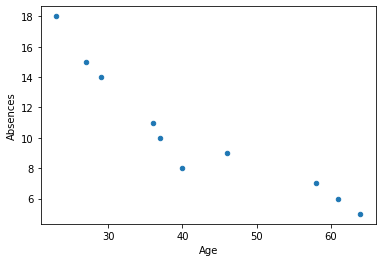

In [85]:
# your code here
df_1 = pd.read_csv('/Users/Zak/Data-Analysis/4.fourth_week/lab-linear-regression-correlation/data/absences.csv')
df = df_1.drop(columns=['Unnamed: 0']).copy()
df_ea = df[['Age','Absences']]
df_ea.plot.scatter('Age','Absences')

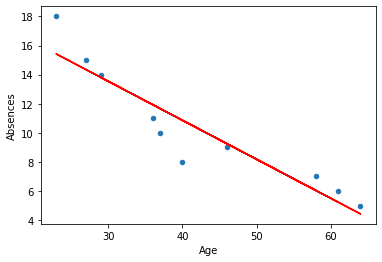

In [89]:
X = df_ea[['Age']]
Y = df_ea['Absences']
clf = LinearRegression()
clf.fit(X,Y)
df_ea.plot.scatter(x='Age', y='Absences')
plt.plot(df_ea['Age'], clf.predict(X), color='red')
#this is just for testing, as I found the code on the slides, I wanted to check it out....

In [ ]:
# your comments here
''' looks like they are perfectly correlated in a negative way, so at young age the absences are high (young people party hard then sleep the day after), while the senior workers have low absences'''

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [109]:
# your code here
def slope_intercept(x1,y1,x2,y2):
    d1 = (x2-x1)
    d2 = (y2-y1)
    m = (d2/d1)
    b = (y1 - (m * x1))
    return m, b
#let's try it out with cordinates from our table, let's take these 2 for example (27,15) and (46,9)
m,b = slope_intercept(27,15,46,9)
print(m)
print(b)

-0.3157894736842105
23.526315789473685


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [110]:
# your code here
def rl(x):
    y = (m * x) + b
    return y
rl(0)

23.526315789473685

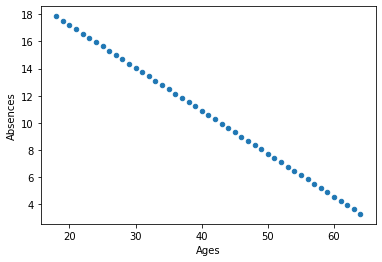

In [111]:
xs = []
ys = []
for x in range(18,65):
    y = rl(x)
    xs.append(x)
    ys.append(y)

ndf = pd.DataFrame({'Ages':xs,'Absences':ys})
ndf.plot.scatter('Ages','Absences')

In [ ]:
# your comments here
''' Well, as I used a linear regression, then the plot looks linear, showing that a 20 year old is prune to have almost 18 absences... it is not as exact as the regression line calculated with pandas...

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [138]:
# your code here
def substract_mean(X):
    k = np.mean(X)
    return [o - k for o in X]

def covar(X,Y):
    n = len(X)
    xmean = substract_mean(X)
    ymean = substract_mean(Y)
    return (sum(i*j for i,j in zip(xmean,ymean)))/(n-1)

def correlation(X,Y):
    s_x = np.std(X)
    s_y = np.std(Y)
    return covar(X,Y)/(s_x * s_y)


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [141]:
# your code here
correlation(xs,ys)

-1.0217391304347825

In [ ]:
# your comments here
'''this shouldnt be greater than -1, but as we defined the functions somewhere the decimals has went wrong....
anyways is a perfect negative correlation'''

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here
''' Seems like age is an indicator for absenteeism, the two variables have a negative correlation, almost perfect'''

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [142]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [146]:
# your code here
ironbeers_df.cov()

,X,Y
X,18.857143,12.0
Y,12.000000,8.0


In [147]:
ironbeers_df.corr()

,X,Y
X,1.000000,0.977008
Y,0.977008,1.000000


In [ ]:
# your comments here
'''the 2 variables are have a positive covariance and also a nearly perfect positive correlation'''

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

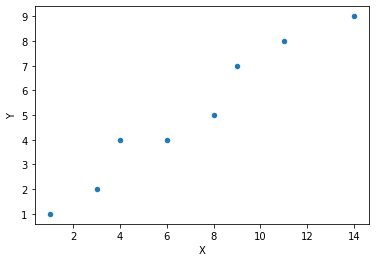

In [151]:
# your code here
ironbeers_df.plot.scatter('X','Y')

In [ ]:
# your comments here
''' just as we already saw with the correlation, the plot gives a graphical view of the almost perfect positive correlation, a line would fit perfectly in-between the dots'''

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

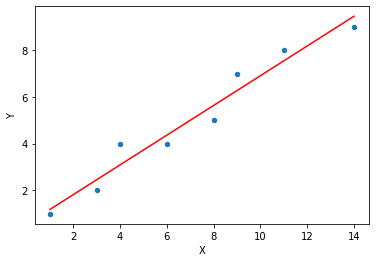

In [156]:
# your code here
X = ironbeers_df[['X']]
Y = ironbeers_df['Y']
clf = LinearRegression()
clf.fit(X,Y)
ironbeers_df.plot.scatter('X','Y')
plt.plot(ironbeers_df['X'], clf.predict(X), color='red')

In [ ]:
# your comments here
''' There we go, seems well fitted, almost on the lines'''

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here